# Decision Tree

**Note: This following cell contains some predefined functions to implement a type of Decision Tree algorithm called CART (Classification and Regression Trees). Please make sure you have run this cell before you run other cells in this notebook.**

In [103]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
import graphviz 

def loadDataSet(dataset):
    with open(dataset) as f:
        data=f.readlines()
        attributes=data[0].rstrip().split(',')[:-1]
        instances=[entry.rstrip().split(',')[:-1] for entry in data[1:]]
        dataArray=[]
        for i in range(len(instances[0])):
            try:
                dataArray.append([float(instance[i]) for instance in instances])
            except:
                dataArray.append((encode([instance[i] for instance in instances])))
        instances=np.array(dataArray).T
        labels=[entry.rstrip().split(',')[-1] for entry in data[1:]]
        return attributes,instances,labels

def encode(data):
    #encodedData={}
    uniqueVals=list(set(data))
    #for Val in uniqueVals:
        #encodedData[Val]=uniqueVals.index(Val)
    encodedData=map(uniqueVals.index,data)
    return encodedData

def set_index(data):
    uniqueVals=list(set(data))
    sortedList=sorted([data.index(Val) for Val in uniqueVals])
    for i in sortedList:
        uniqueVals.append(data[i])
    return uniqueVals[len(uniqueVals)/2:]

## Build a classifier ##

In [ ]:
dataset=raw_input('Please Enter Your Data Set:')
n_foldCV=int(raw_input("Please Enter the Number of Folds:"))
attributes,instances,labels=loadDataSet(dataset)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(instances,labels)
scores = cross_val_score(clf, instances, labels, cv=n_foldCV)

## Evaluate a classifier##

The following cell will output the accuracy score in each run and the accuracy estimate of the model under 95% confidence interval

In [108]:
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.96666667  0.96666667  0.9         0.96666667  1.        ]
Accuracy: 0.96 (+/- 0.07)


## Visualize a tree##

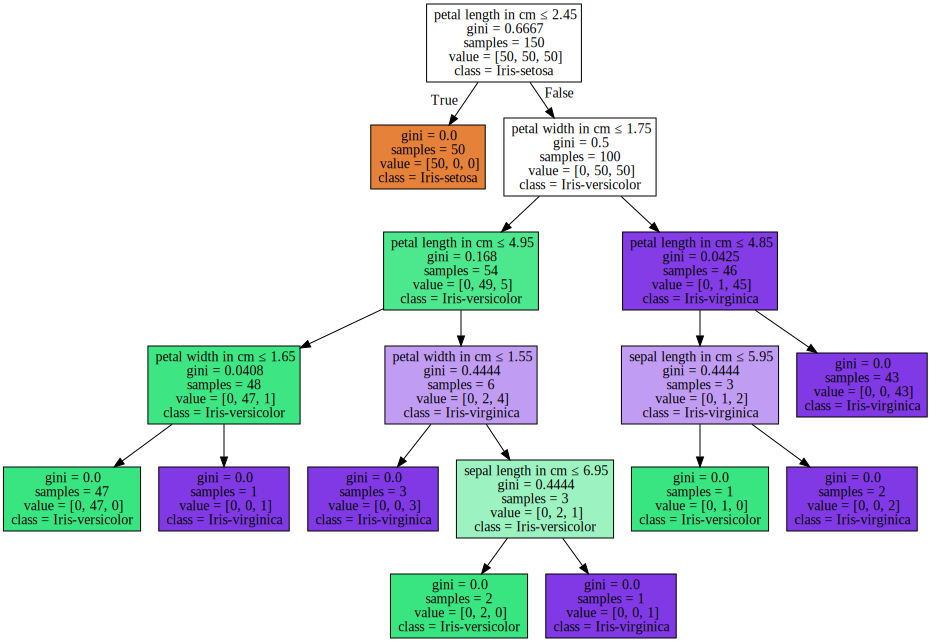

In [109]:
classnames=set_index(labels)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=attributes,class_names=classnames,filled=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Prediction##

In [50]:
testset=['5.1', '3.5', '1.4', '0.2']
predictions=clf.predict(testset)

/Users/YiboMa/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [51]:
print predictions

['Iris-setosa']
